<a href="https://colab.research.google.com/github/arshina-azam/Beginner-Friendly/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of rows are:  768
Number of columns are:  7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
number of duplicated rows are 27
No. of unique values in Region is 28
No. of unique values in  Date is 14
No. of unique values in  Frequency is 2
No. of 

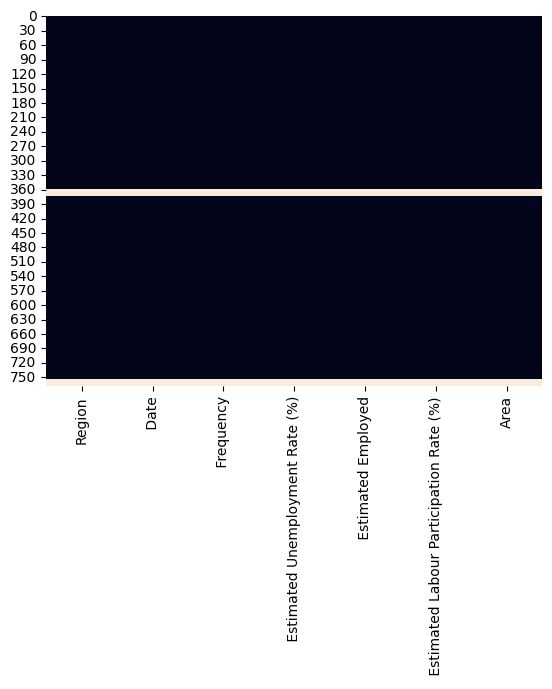

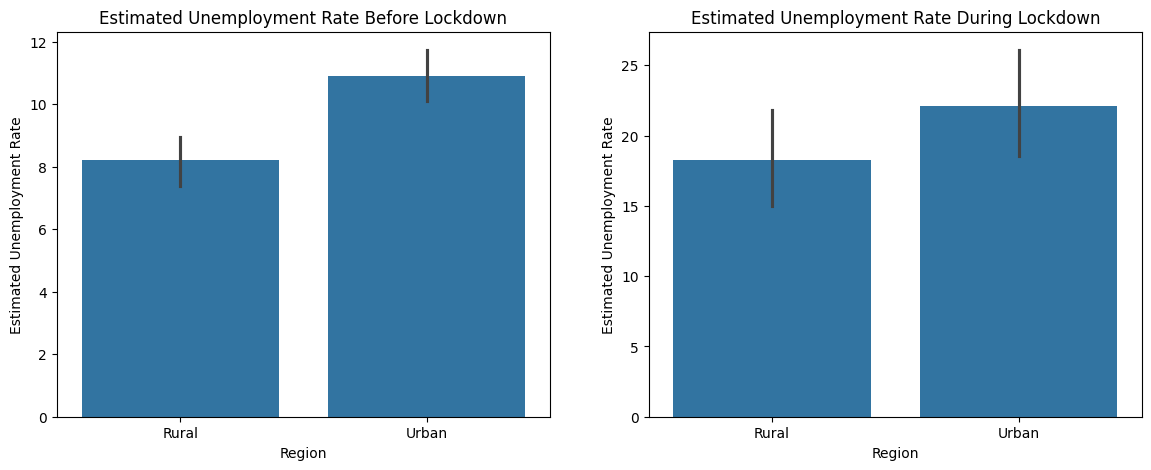

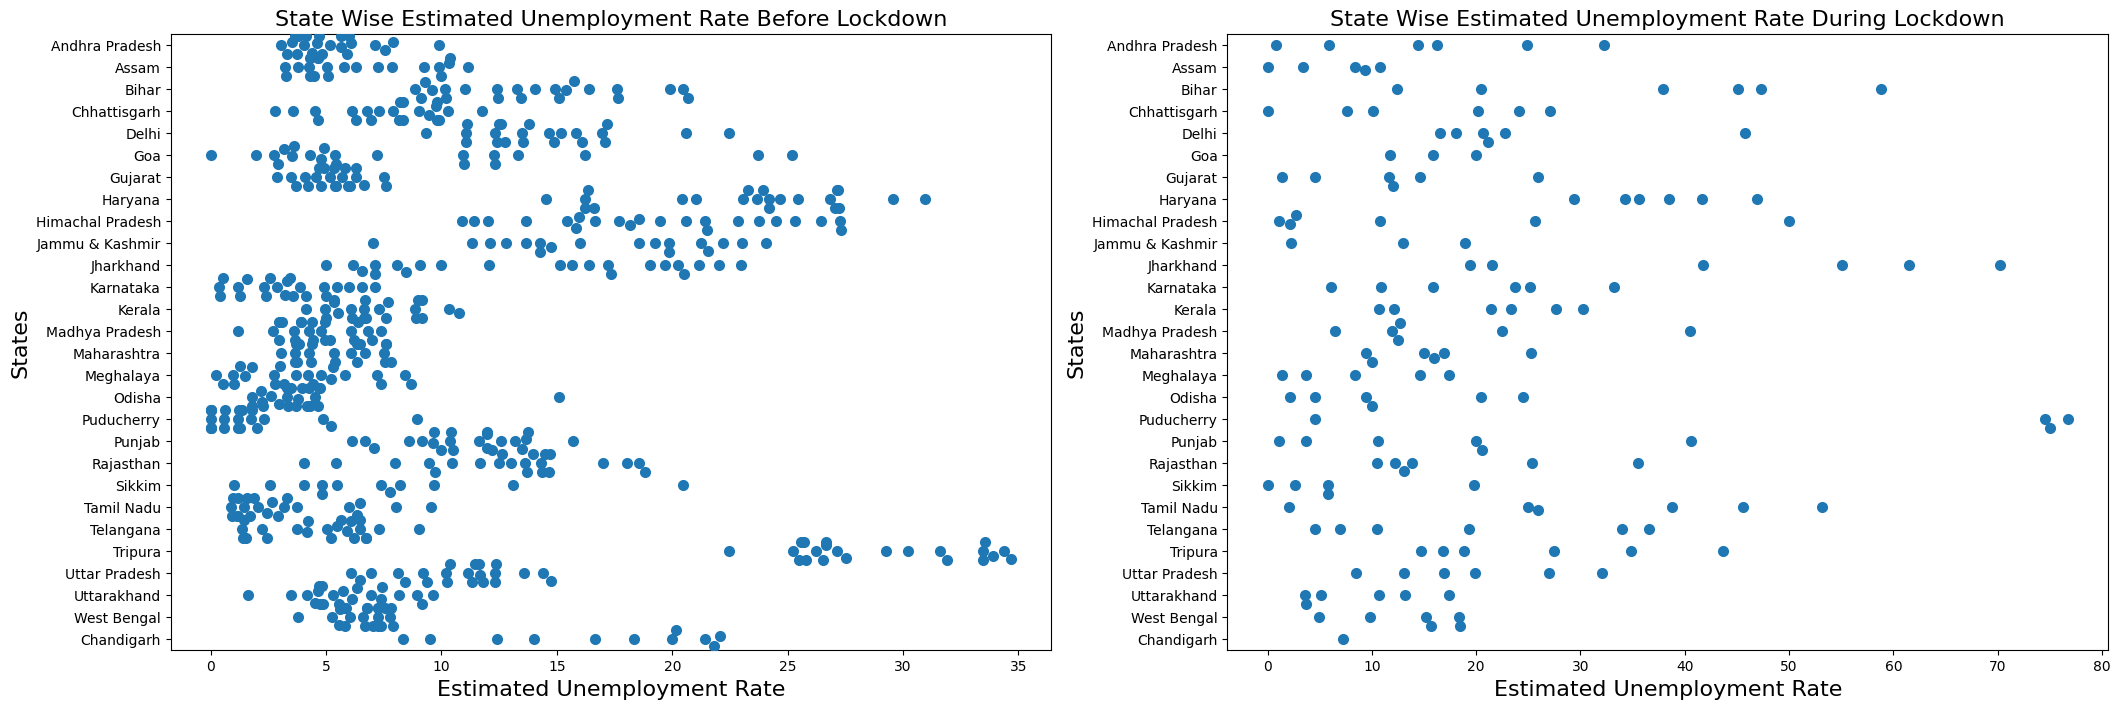

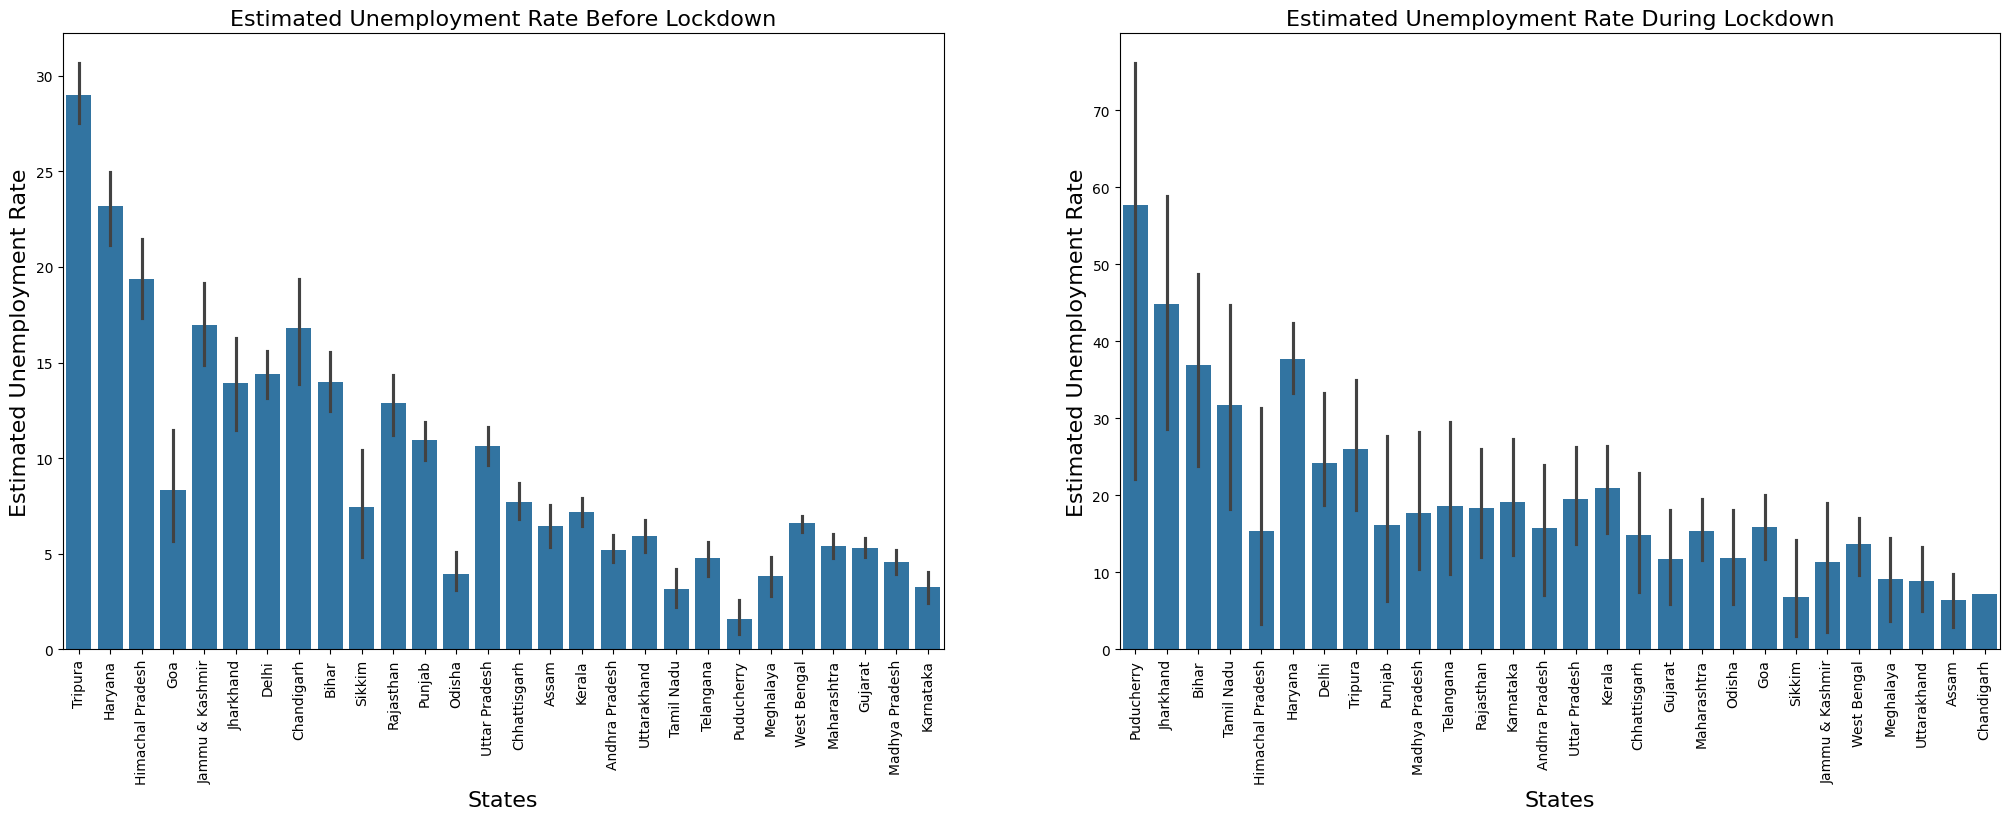

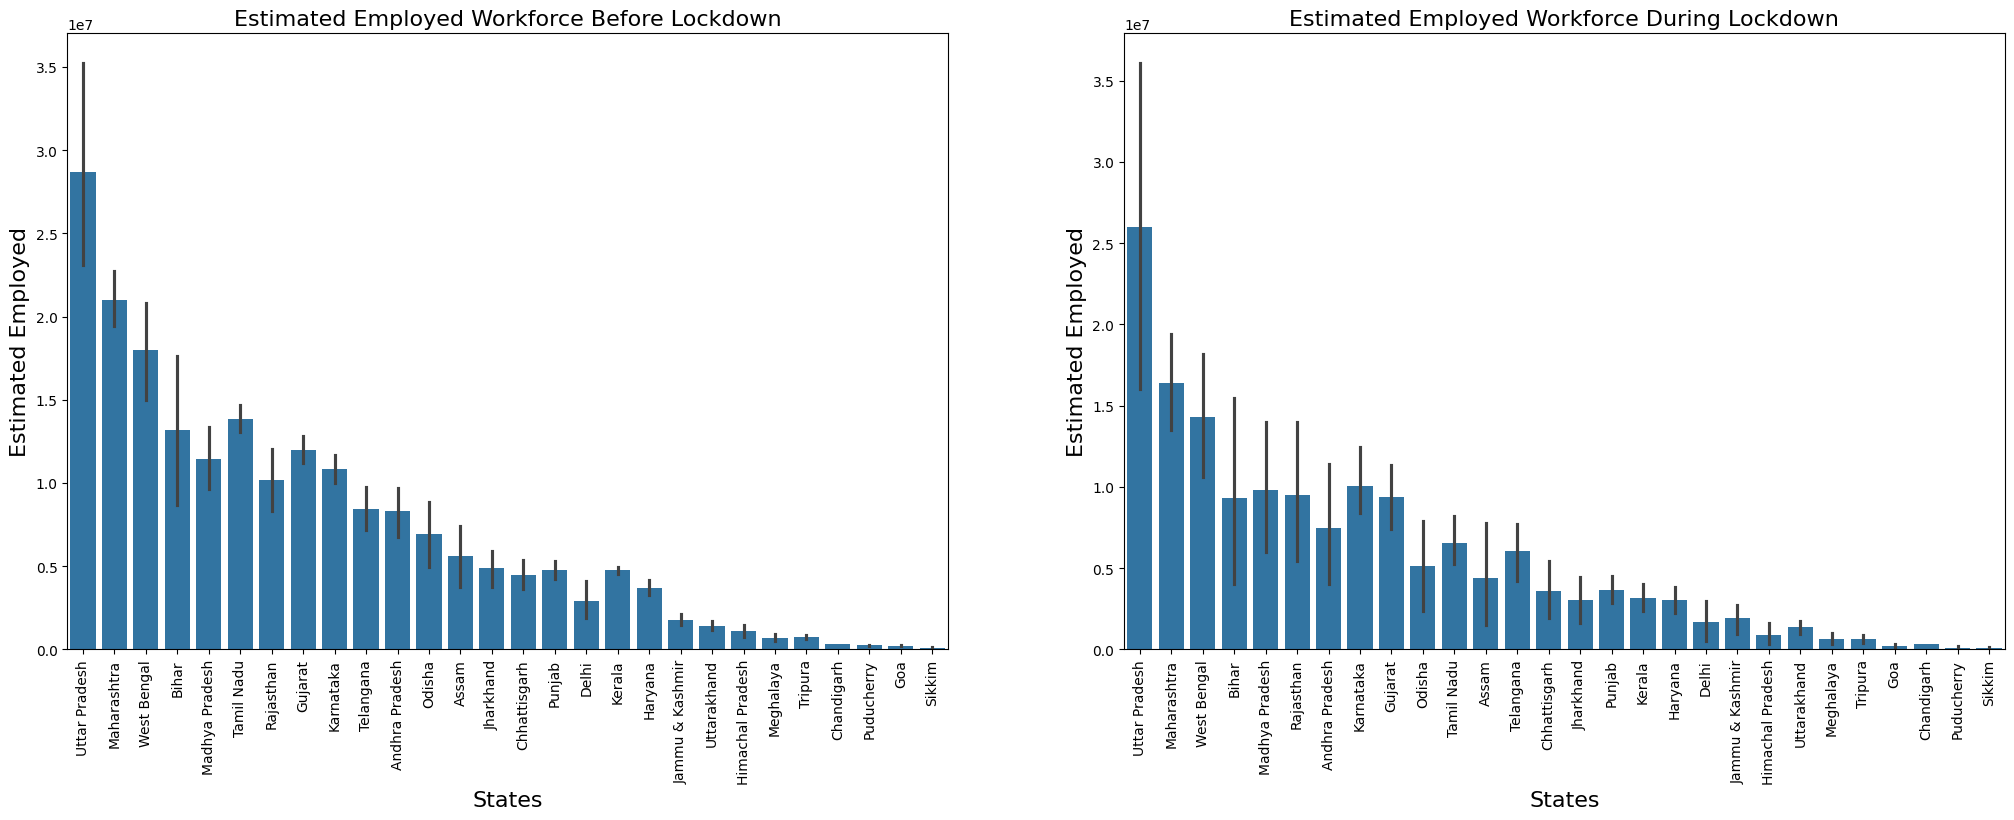

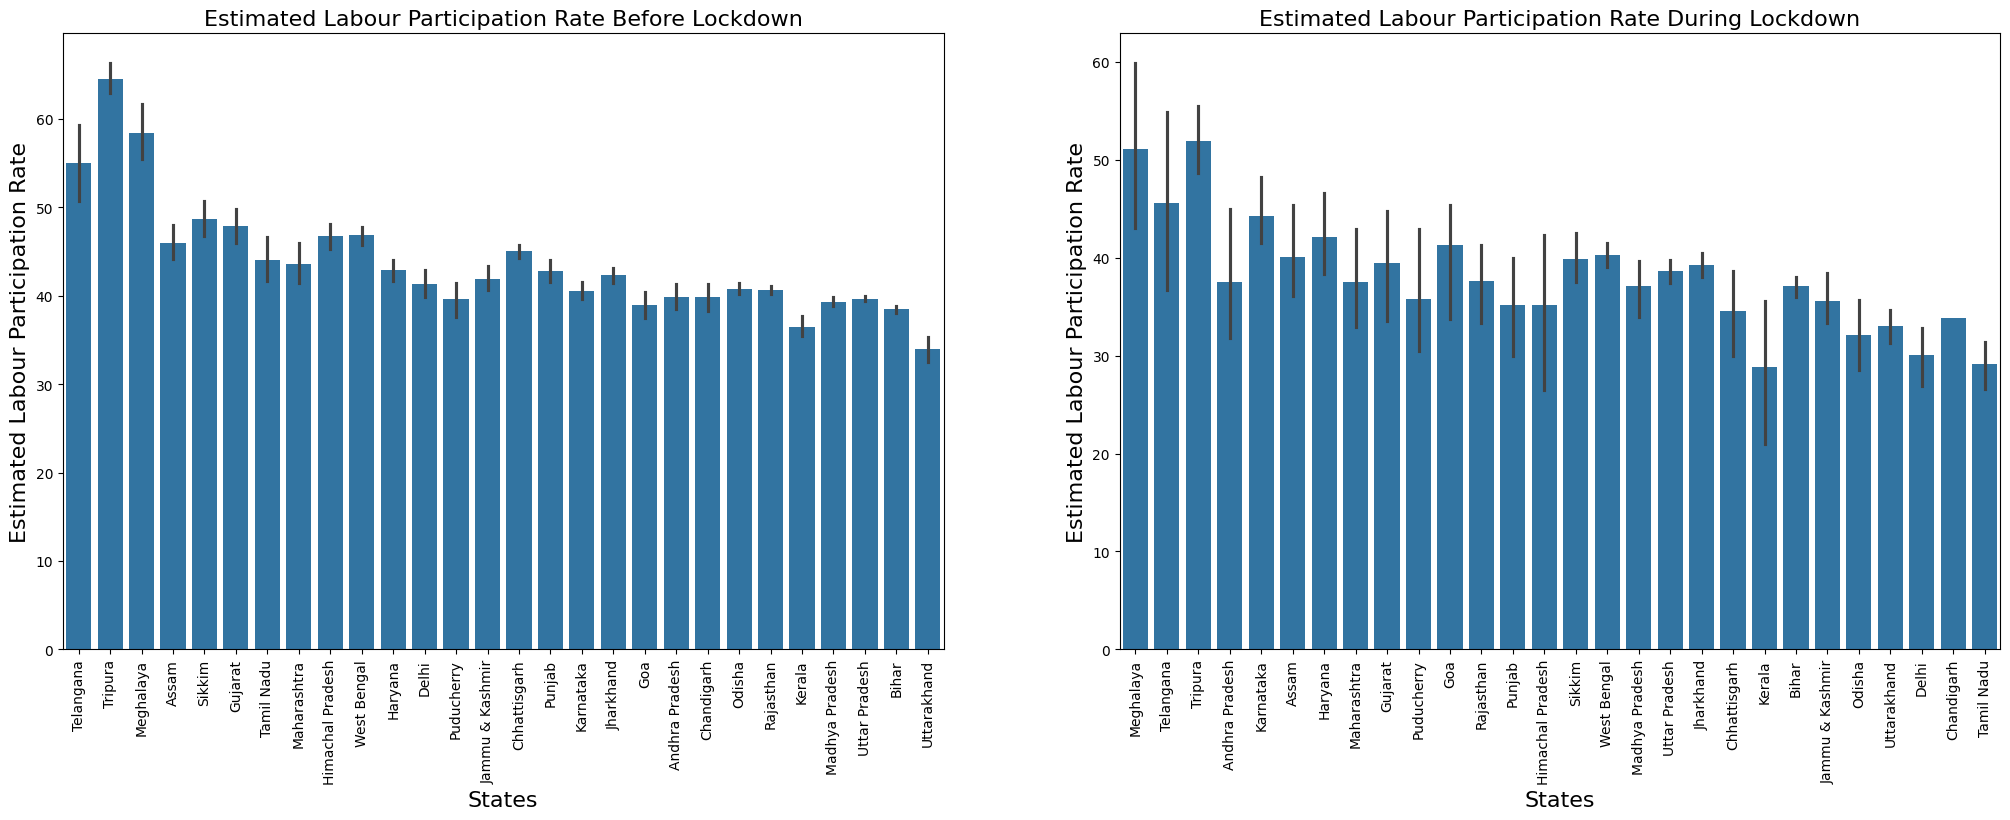

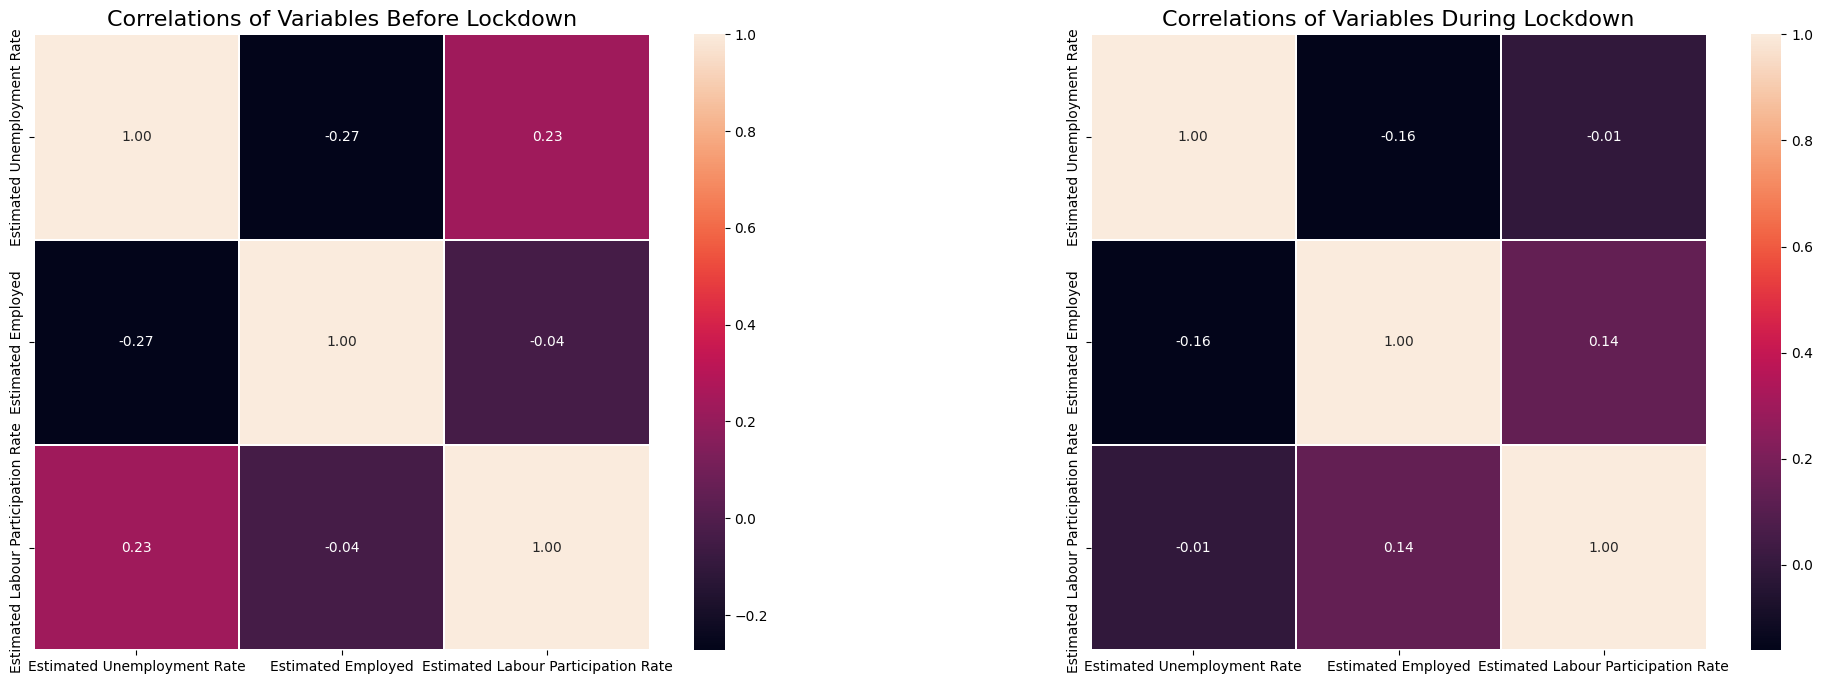

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset
df = pd.read_csv("/content/Unemployment in India.csv")

# Dataset First Look
# View top 5 rows of the dataset
df.head()


# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])


# Dataset Info
# Checking information about the dataset using info
df.info()

# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

# Missing Values/Null Values Count
df.isnull().sum()


# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)


# Dataset Columns
df.columns

# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)


# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')


# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)


# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)


# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()


# Drop all the missing values from 'df' dataset
df=df.dropna()


# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]


# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]



# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()

# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()


# Chart - 3 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()


# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()



# Chart - 5 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()


# Create new DataFrames
df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]


# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()

